<a href="https://colab.research.google.com/github/nimalan-parameshwaran/Exploratory_Data_Analysis_using_R/blob/main/Exploratory_Data_Analysis_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
data<-read.csv("/content/supermarket_sales.csv")

In [19]:
dim(data)

[1] 1000   17

In [22]:
str(data)

'data.frame':	1000 obs. of  17 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ City                   : chr  "Yangon" "Naypyitaw" "Yangon" "Yangon" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax.5.                 : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet

In [23]:
names(data)

[1] "Invoice.ID"              "Branch"                 
 [3] "City"                    "Customer.type"          
 [5] "Gender"                  "Product.line"           
 [7] "Unit.price"              "Quantity"               
 [9] "Tax.5."                  "Total"                  
[11] "Date"                    "Time"                   
[13] "Payment"                 "cogs"                   
[15] "gross.margin.percentage" "gross.income"           
[17] "Rating"

In [25]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
library(ggplot2)
library(gridExtra)
library(lubridate)
library(dplyr)
library(gridExtra)

In [29]:
data_removed <- data[,-1]
data_removed$Date <- as.Date(data_removed$Date, "%m/%d/%y")
year(data_removed$Date) <- 2019

In [30]:
sapply(data_removed, function(x) sum(is.na(x)))

Branch                    City           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                  Tax.5.                   Total 
                      0                       0                       0 
                   Date                    Time                 Payment 
                      0                       0                       0 
                   cogs gross.margin.percentage            gross.income 
                      0                       0                       0 
                 Rating 
                      0

In [31]:
summary(data_removed)

    Branch              City           Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity         Tax.5.       
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

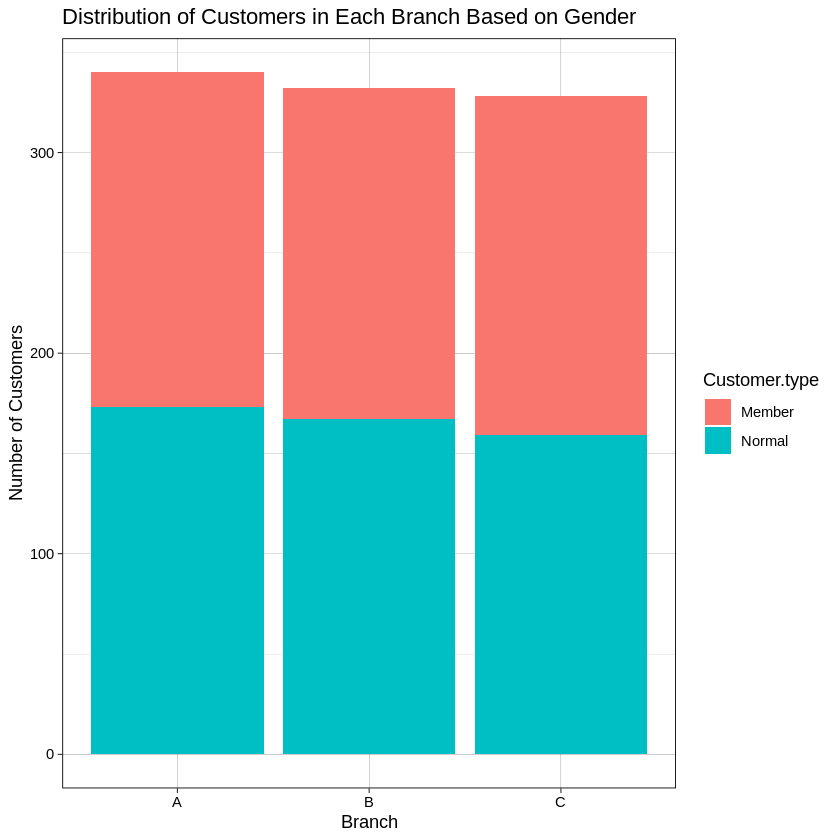

In [74]:
p <- ggplot(data = data_removed, mapping = aes(x = Branch)) + geom_bar(mapping = aes(fill = Customer.type)) + theme_linedraw() + ggtitle("Distribution of Customers in Each Branch Based on Gender") + xlab("Branch") + ylab("Number of Customers")
p

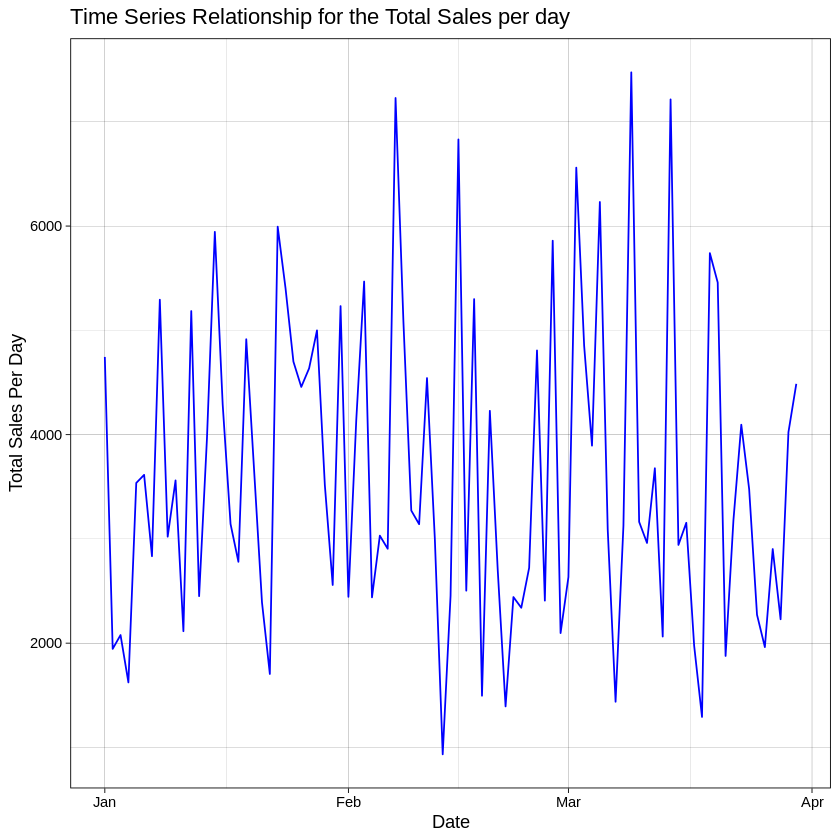

In [81]:
total_sales_per_day <- data.frame(xtabs(formula=Total~Date, data=data_removed))
total_sales_per_day$Date <- as.Date(total_sales_per_day$Date)

ggplot(data = total_sales_per_day, mapping = aes(x = Date, y = Freq))+ geom_line(color="blue")+ theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day")+ xlab("Date")+ ylab("Total Sales Per Day")

In [41]:
A <- data_removed %>% filter(Branch == "A")
total_A <- data.frame(xtabs(formula = Total~Date, data = A))
total_A$Date <- as.Date(total_A$Date)
B <- data_removed %>% filter(Branch == "B")
total_B <- data.frame(xtabs(formula = Total~Date, data = B))
total_B$Date <- as.Date(total_B$Date)
C <- data_removed %>% filter(Branch == "C")
total_C <- data.frame(xtabs(formula = Total~Date, data = C))
total_C$Date <- as.Date(total_C$Date)

In [42]:
plot1 <- ggplot(data = total_A, mapping = aes(x = Date, y = Freq))+ geom_line()+ theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch A")+ xlab("Date")+ ylab("Total Sales Per Day")

In [43]:
plot2 <- ggplot(data = total_B, mapping = aes(x = Date, y = Freq))+ geom_line()+ theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch B")+ xlab("Date")+ ylab("Total Sales Per Day")

In [44]:
plot3 <- ggplot(data = total_C, mapping = aes(x = Date, y = Freq))+ geom_line()+ theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch C")+ xlab("Date")+ ylab("Total Sales Per Day")

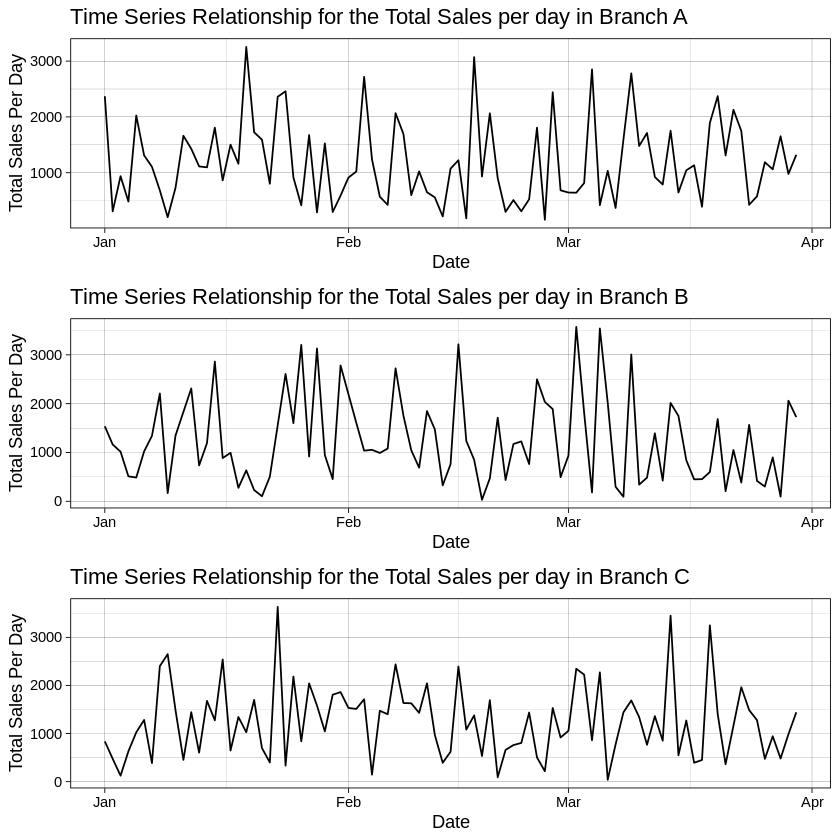

In [45]:
grid.arrange(plot1, plot2, plot3)

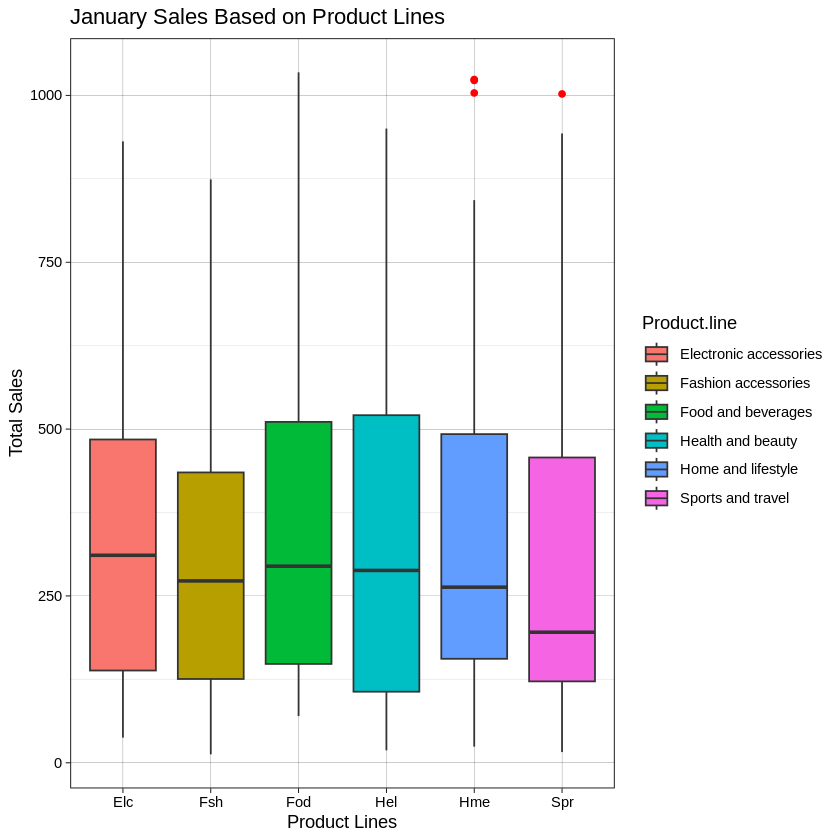

In [60]:
Jan_sales <- data_removed %>% mutate(month = month(Date)) %>% filter(month == 1)
p1 <- ggplot(data = Jan_sales, mapping = aes(x = Product.line, y = Total))+ geom_boxplot(mapping = aes(fill = Product.line), outlier.color = "red") + scale_x_discrete(labels = c("Elc", "Fsh", "Fod", "Hel", "Hme", "Spr")) + theme_linedraw() + ggtitle("January Sales Based on Product Lines") + xlab("Product Lines") + ylab("Total Sales")
p1

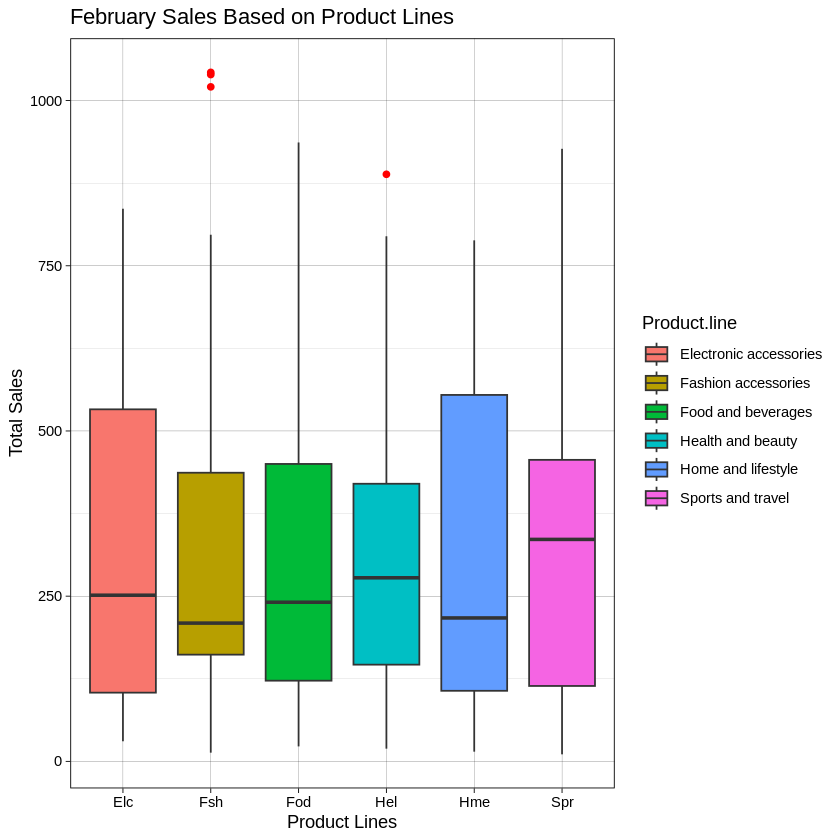

In [59]:
Feb_sales <- data_removed %>% mutate(month = month(Date)) %>% filter(month == 2)
p2 <- ggplot(data = Feb_sales, mapping = aes(x = Product.line, y = Total))+ geom_boxplot(mapping = aes(fill = Product.line), outlier.color = "red") + scale_x_discrete(labels = c("Elc", "Fsh", "Fod", "Hel", "Hme", "Spr")) + theme_linedraw() + ggtitle("February Sales Based on Product Lines") + xlab("Product Lines") + ylab("Total Sales")
p2

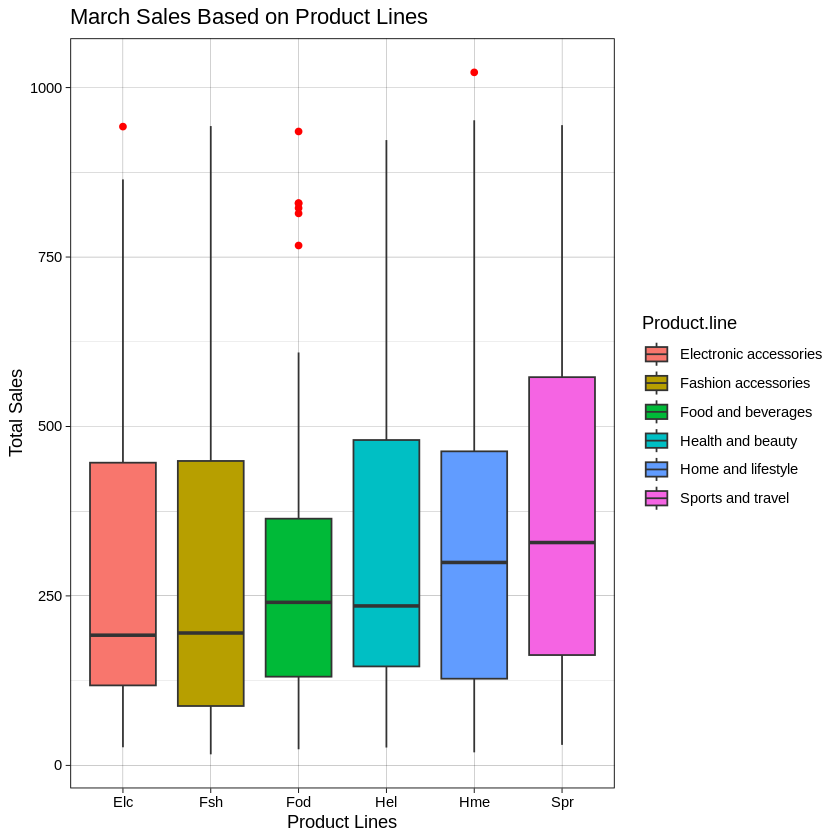

In [51]:
Mar_sales <- data_removed %>% mutate(month = month(Date)) %>% filter(month == 3)
p3 <- ggplot(data = Mar_sales, mapping = aes(x = Product.line, y = Total))+ geom_boxplot(mapping = aes(fill = Product.line), outlier.color = "red") + scale_x_discrete(labels = c("Elc", "Fsh", "Fod", "Hel", "Hme", "Spr")) + theme_linedraw() + ggtitle("March Sales Based on Product Lines") + xlab("Product Lines") + ylab("Total Sales")
p3

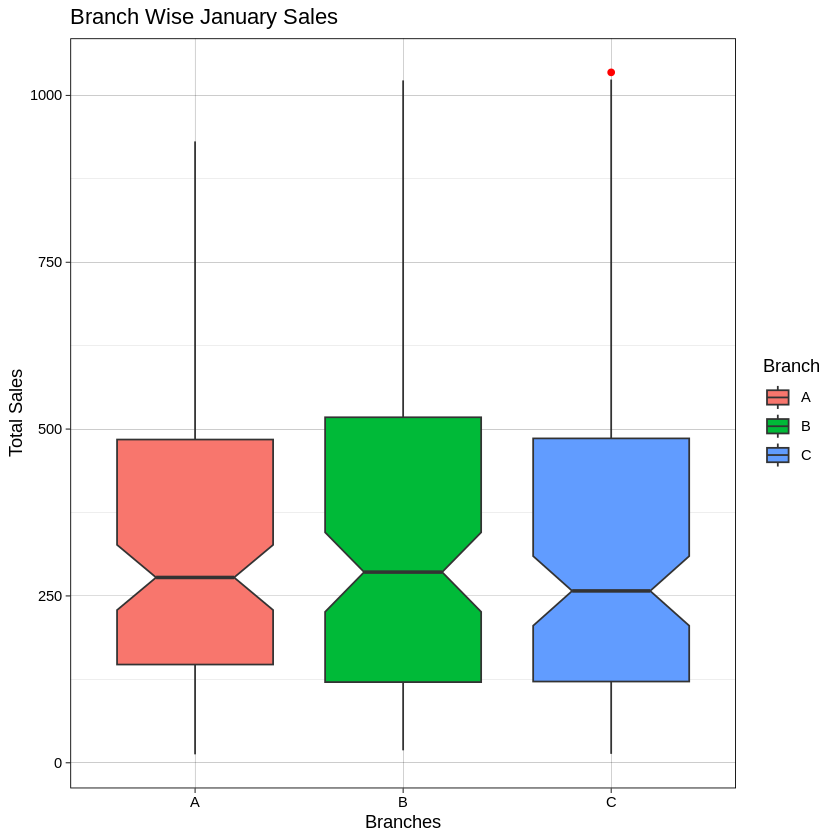

In [58]:
pl1 <- ggplot(data = Jan_sales, mapping = aes(x = Branch, y = Total)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch), outlier.color = "red") + theme_linedraw() + ggtitle("Branch Wise January Sales") + xlab("Branches") + ylab("Total Sales")
pl1

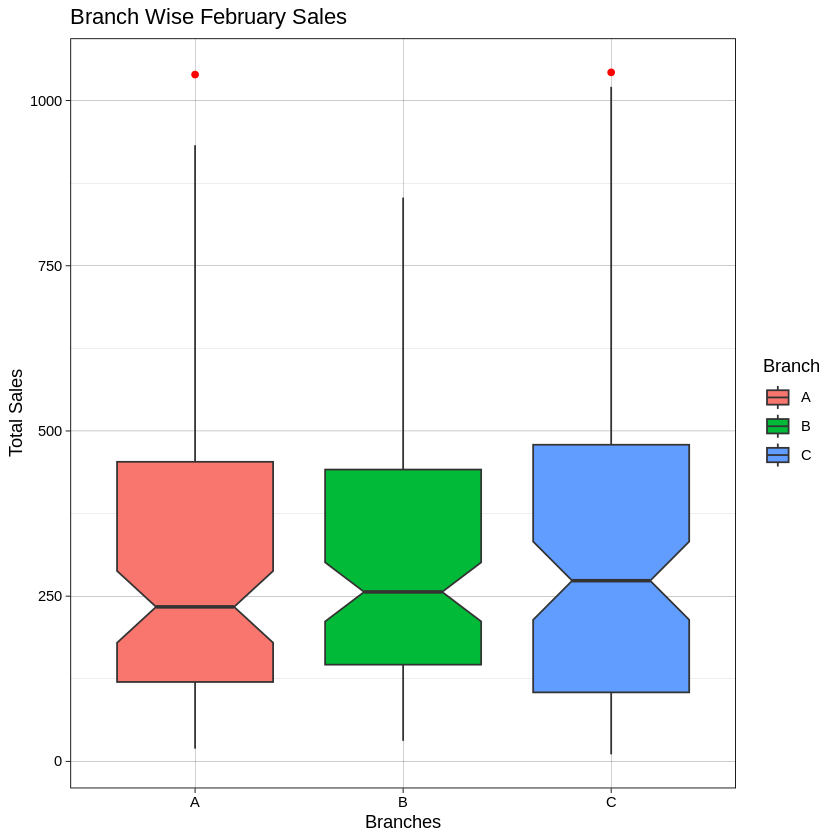

In [57]:
pl2 <- ggplot(data = Feb_sales, mapping = aes(x = Branch, y = Total)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch), outlier.color = "red") + theme_linedraw() + ggtitle("Branch Wise February Sales") + xlab("Branches") + ylab("Total Sales")
pl2

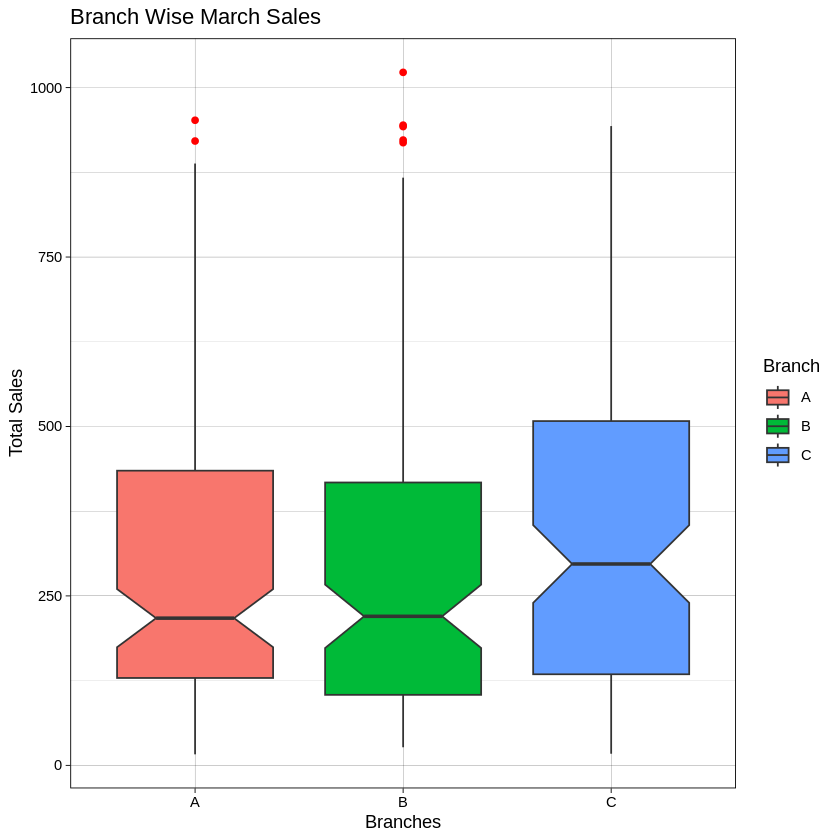

In [56]:
pl3<- ggplot(data = Mar_sales, mapping = aes(x = Branch, y = Total)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch), outlier.color = "red") + theme_linedraw() + ggtitle("Branch Wise March Sales") + xlab("Branches") + ylab("Total Sales")
pl3